In [1]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns
import random
import sys
import copy
from igraph import *
import time
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [44]:
g = Graph.Read_Ncol("soc-Epinions1.txt", directed = True)
with open('redes e centralidades/centralidades-soc-Epinions1-picke.txt', 'rb') as f:
    centralidade_list = pickle.load(f)

In [45]:
for i in centralidade_list:
    
    print sorted(i,reverse=True)[:10],'\n'

[0.04057829673950289, 0.029112522733862254, 0.026344922111811067, 0.02585729724030681, 0.022298953583383855, 0.022259416431640266, 0.019966261630512138, 0.018266164105537837, 0.01730409341311052, 0.017014154300324207] 

[0.016644931968783784, 0.013933385852905496, 0.013674239370466324, 0.013112800117706491, 0.012675819578217184, 0.012570425428405401, 0.011636849291163183, 0.010680049991203231, 0.007825088325682572, 0.007803634437215065] 

[0.004657194750781488, 0.0028806802935228354, 0.0021545609735657357, 0.002121522479957848, 0.002058821821771401, 0.002035177200610162, 0.0020036756423157677, 0.0015923816594210368, 0.0015263284950160763, 0.0014781820321578413] 

[0.2885720545129263, 0.2687877488457861, 0.2665230667673981, 0.2654485807095569, 0.2648962044822316, 0.26485278161282527, 0.26471926203043805, 0.2608919480530762, 0.26043744655335876, 0.2590450506987298] 

[0.13455432897061093, 0.12647049843670377, 0.11655919358441771, 0.11107223372669849, 0.1105597363157683, 0.105499283595417

In [46]:
len(centralidade_list)

7

In [47]:
X = np.array(centralidade_list)
X = X.transpose()
X[5] = stats.zscore(X[5])

# problemas de escala

# X = stats.zscore(X)
X.shape

(75879, 7)

In [48]:
varience_values = []

pca = PCA(n_components=1,svd_solver='full')
teste = pca.fit_transform(X)
explained_varience = pca.explained_variance_ratio_.sum()
print(float(pca.explained_variance_ratio_.sum()*100))
print(pca.explained_variance_ratio_,len(pca.explained_variance_ratio_))
print(pca.singular_values_,len(pca.singular_values_))  

99.9999999999
(array([1.]), 1)
(array([1720687.13984513]), 1)


In [49]:
lista_teste = teste.tolist()
len(lista_teste)
#  a partir daqui é so pegar os index igual no que ja tem
pca_values = []
for sublist in lista_teste:
    for item in sublist:
        pca_values.append(item)
        
len(pca_values)
# print(flat_list[:50])

75879

In [50]:
a = np.array(pca_values)
a = a.reshape(len(a),1)
X = np.append(X,a,axis=1)
X.shape

(75879, 8)

In [51]:
labels_medidas = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality','7_PCA_all(0-6)']
labels_medidas

['0_grau',
 '1_betweennes',
 '2_pagerank',
 '3_closeness',
 '4_eigenvector_centrality',
 '5_harmonic_centrality',
 '6_load_centrality',
 '7_PCA_all(0-6)']

In [52]:
#  A partir daqui analise de correlacao entre as medidas

In [53]:
def calcula_PCA(matrix,col1,col2): # pca entre duas colunas
    vindex = [i for i in range(g.vcount())]
    
    Y = np.array([matrix[:,col1],matrix[:,col2]])
    Y = Y.transpose()
#     print (Y.shape)
#     print (Y,type(Y),type(Y[0]),len(Y[0]))
    
    pca = PCA(n_components=1,svd_solver='full')
    teste = pca.fit_transform(Y)
    explained_varience = pca.explained_variance_ratio_.sum()
    print(float(pca.explained_variance_ratio_.sum()*100))
    lista_teste = teste.tolist()
    flat_list = []
    for sublist in lista_teste:
        for item in sublist:
            flat_list.append(item)
    aflat, seeds_PCA = (list(x) for x in zip(*sorted(zip(flat_list, vindex), reverse=True)))
    return (seeds_PCA,np.array(flat_list))

In [63]:
def calcKendall(matrix):
    matrix_kendall = []
    for i in range(matrix.shape[1]):
        kend = []
        for j in range(matrix.shape[1]):
            tau, p_value = kendalltau(matrix[:,i],matrix[:,j])
            kend.append(tau)
        matrix_kendall.append(kend)
    matrix_kendall = np.array(matrix_kendall)
    return(matrix_kendall)

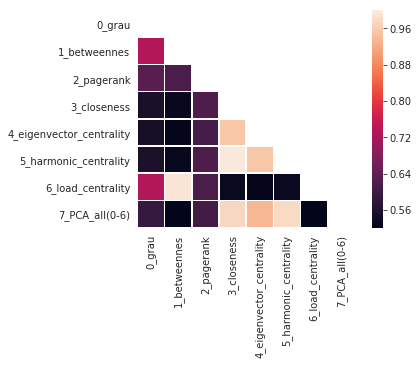

In [64]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

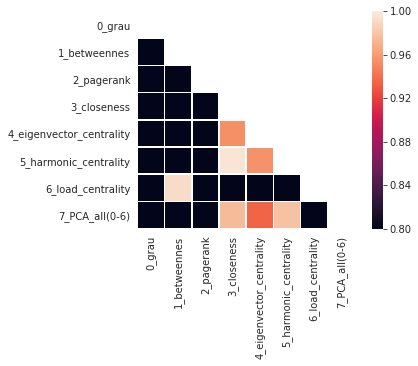

In [65]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmin=.8,mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

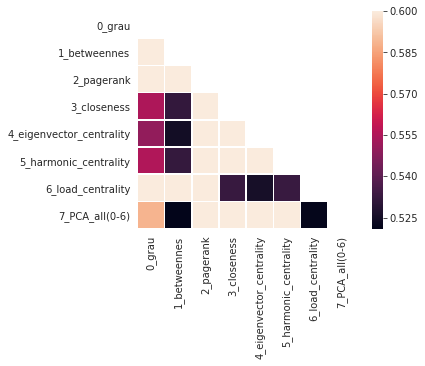

In [66]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmax = .6,mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

In [67]:
matrix_teste = X

In [68]:
# Alta correlacao SOC-Epinions

c_1_6 = calcula_PCA(matrix_teste,1,6)
c_3_4 = calcula_PCA(matrix_teste,3,4)
c_3_5 = calcula_PCA(matrix_teste,3,5)
c_4_5 = calcula_PCA(matrix_teste,4,5)

99.9975067587
99.7699334952
100.0
100.0


In [69]:
# Baixa correlacao SOC-Epinions

c_0_3 = calcula_PCA(matrix_teste,0,3)
c_0_4 = calcula_PCA(matrix_teste,0,4)
c_0_5 = calcula_PCA(matrix_teste,0,5)

c_1_3 = calcula_PCA(matrix_teste,1,3)
c_1_4 = calcula_PCA(matrix_teste,1,4)
c_1_5 = calcula_PCA(matrix_teste,1,5)

99.9584882856
92.1018010807
100.0
99.9646358969
89.8631003511
100.0


In [70]:
#  adicionando na matrix temporaria SOC-Epinions

matrix_teste = np.hstack((matrix_teste, np.array([c_1_6[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_3_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_3_5[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_4_5[1]]).transpose()))

matrix_teste = np.hstack((matrix_teste, np.array([c_0_3[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_0_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_0_5[1]]).transpose()))

matrix_teste = np.hstack((matrix_teste, np.array([c_1_3[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_5[1]]).transpose()))
matrix_teste.shape

(75879, 18)

In [71]:
# olhando correlacao das novas medidas da matrix teste

In [72]:
# Soc-Epinions
labels = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality','7_PCA_all','16','34','35','45','03','04','05','13','14','15']

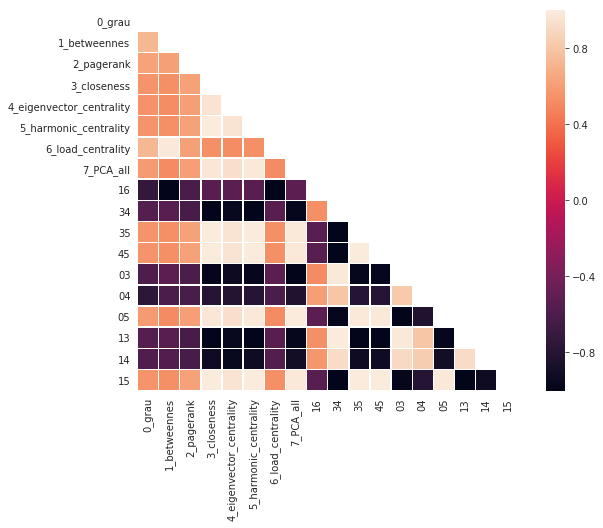

In [73]:
# 
a = plt.figure(figsize=(10,7))
corr = calcKendall(matrix_teste)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels,yticklabels=labels,linewidths=.5)

In [74]:
import pandas as pd


In [75]:
vindex = [i for i in range(g.vcount())]

my_list = X
### my_list[0] = grau
### my_list[1] = betweenness
### my_list[2] = pagerank
### my_list[3] = closeness
### my_list[4] = eigenvector_centrality
### my_list[5] = harmonic_centrality
### my_list[6] = load_centrality 
### my_list[7] = PCA_all
### ...etc
aflat, seeds_grau = (list(x) for x in zip(*sorted(zip(my_list[:,0], vindex), reverse=True)))
aflat, seeds_betweennes = (list(x) for x in zip(*sorted(zip(my_list[:,1], vindex), reverse=True)))
aflat, seeds_pagerank = (list(x) for x in zip(*sorted(zip(my_list[:,2], vindex), reverse=True)))
aflat, seeds_closeness = (list(x) for x in zip(*sorted(zip(my_list[:,3], vindex), reverse=True)))
aflat, seeds_eigenvector_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,4], vindex), reverse=True)))
aflat, seeds_harmonic_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,5], vindex), reverse=True)))
aflat, seeds_load_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,6], vindex), reverse=True)))
aflat, seeds_PCA = (list(x) for x in zip(*sorted(zip(pca_values, vindex), reverse=True)))


In [76]:
d = {'0_grau' : seeds_grau[:100],'1_betweennes':seeds_betweennes[:100],
     '2_pagerank' :seeds_pagerank[:100],'3_closeness':seeds_closeness[:100],
     '4_eigenvector_centrality':seeds_eigenvector_centrality[:100],'5_harmonic_centrality':seeds_harmonic_centrality[:100],
     '6_load_centrality':seeds_load_centrality[:100],'7_PCA_all':seeds_PCA[:100],
     'm_1_6':c_1_6[0][:100],
     'm_34':c_3_4[0][:100],'m_35':c_3_5[0][:100],
     'm_45':c_4_5[0][:100],
     'm_03':c_0_3[0][:100],
     'm_04':c_0_4[0][:100],'m_05':c_0_5[0][:100],
     'm_13':c_1_3[0][:100],
     'm_14':c_1_4[0][:100],'m_15':c_1_5[0][:100]}

In [77]:
df = pd.DataFrame(data=d)
df.head()

0_grau  1_betweennes  2_pagerank  3_closeness  4_eigenvector_centrality  \
0      14            40          14           14                        14   
1     363          1677         185          185                       150   
2    1867          1867         529          132                       157   
3    1677           697         230          230                       185   
4     530           363         114          530                        30   

   5_harmonic_centrality  6_load_centrality  7_PCA_all   m_03   m_04  m_05  \
0                     14                 40         14      5      5    14   
1                    185               1677        185  75878  75878   185   
2                    530               1867        530  75877  75877   530   
3                    132                697        132  75875  75875   132   
4                    230                363        230  75874  75874   230   

    m_13   m_14  m_15  m_1_6   m_34  m_35  m_45  
0      5      5    14      5      5    14    14  
1  75878  75878   185  75878  75878   185   185  
2  75877  75877   530  75877  75877   530   530  
3  75876  75876   132  75876  75876   132   132  
4  75875  75875   230  75875  75875   230   230

In [78]:
s = [seeds_grau[:50],seeds_betweennes[:50],
    seeds_pagerank[:50],seeds_closeness[:50],
    seeds_eigenvector_centrality[:50],seeds_harmonic_centrality[:50],
    seeds_load_centrality[:50],seeds_PCA[:50],c_1_6[0][:50],
    c_3_4[0][:50],c_3_5[0][:50],c_4_5[0][:50], 
    c_0_3[0][:50],c_0_4[0][:50],
    c_0_5[0][:50],
    c_1_3[0][:50],c_1_4[0][:50],
    c_1_5[0][:50]]
with open('sementes-SOC-Epinions.txt', 'wb') as f:
    pickle.dump(s, f)